In [ ]:
# 目的是消除生成图片中的 大网格，或者脏兮兮的一团一团的东西

In [24]:
import numpy as np
from sklearn.model_selection import train_test_split
from skimage.util import random_noise
import torch
import torch.utils.data as Data 
from torch.nn import functional as F

from tqdm import tqdm
import os
import random
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # mpimg 用于读取图片


In [13]:
# tensor 
x = Image.open('./test/a4568_h.png')
y = Image.open('./test/a4568_pre.png')
x_1 = np.array(x)/255.
y_1 = np.array(y)/255.



x_torch = torch.from_numpy(image.transpose(2,0,1)) 
y_torhc = 
print(y_array)

[[[0.69019608 0.65098039 0.63921569]
  [0.7254902  0.68627451 0.6745098 ]
  [0.7254902  0.69411765 0.66666667]
  ...
  [0.77254902 0.72156863 0.7254902 ]
  [0.74509804 0.71372549 0.71372549]
  [0.70980392 0.67843137 0.6627451 ]]

 [[0.71372549 0.70196078 0.6745098 ]
  [0.71764706 0.69803922 0.68235294]
  [0.72156863 0.69019608 0.68627451]
  ...
  [0.75294118 0.7254902  0.7372549 ]
  [0.75294118 0.72156863 0.72941176]
  [0.75294118 0.71372549 0.72156863]]

 [[0.71372549 0.69019608 0.68235294]
  [0.71372549 0.69803922 0.67843137]
  [0.72156863 0.69411765 0.67843137]
  ...
  [0.76078431 0.74117647 0.7254902 ]
  [0.76078431 0.7372549  0.72941176]
  [0.74901961 0.73333333 0.72156863]]

 ...

 [[0.65490196 0.61960784 0.58823529]
  [0.6627451  0.63137255 0.59215686]
  [0.65490196 0.63137255 0.59215686]
  ...
  [0.67843137 0.65490196 0.62745098]
  [0.67058824 0.64313725 0.61568627]
  [0.66666667 0.63921569 0.60784314]]

 [[0.65098039 0.62352941 0.59607843]
  [0.65882353 0.63529412 0.60392157]


In [14]:
np.roll(y_array, 8, axis = 1)

array([[[0.7254902 , 0.68627451, 0.6745098 ],
        [0.7254902 , 0.69411765, 0.66666667],
        [0.7254902 , 0.69019608, 0.6745098 ],
        ...,
        [0.74509804, 0.71372549, 0.71372549],
        [0.70980392, 0.67843137, 0.6627451 ],
        [0.69019608, 0.65098039, 0.63921569]],

       [[0.71764706, 0.69803922, 0.68235294],
        [0.72156863, 0.69019608, 0.68627451],
        [0.72156863, 0.69019608, 0.67843137],
        ...,
        [0.75294118, 0.72156863, 0.72941176],
        [0.75294118, 0.71372549, 0.72156863],
        [0.71372549, 0.70196078, 0.6745098 ]],

       [[0.71372549, 0.69803922, 0.67843137],
        [0.72156863, 0.69411765, 0.67843137],
        [0.71372549, 0.69411765, 0.6745098 ],
        ...,
        [0.76078431, 0.7372549 , 0.72941176],
        [0.74901961, 0.73333333, 0.72156863],
        [0.71372549, 0.69019608, 0.68235294]],

       ...,

       [[0.6627451 , 0.63137255, 0.59215686],
        [0.65490196, 0.63137255, 0.59215686],
        [0.65882353, 0

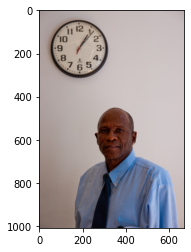

In [39]:
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

%matplotlib inline

img_path = "./test/a4568_h.png"
img_torch = transforms.ToTensor()(Image.open(img_path))

plt.imshow(img_torch.numpy().transpose(1,2,0))
plt.show()

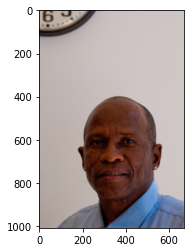

In [43]:
from torch.nn import functional as F

theta = torch.tensor([
    [0.5, 0  , 0],
    [0  , 0.5, 0]
], dtype=torch.float)
grid = F.affine_grid(theta.unsqueeze(0), img_torch.unsqueeze(0).size())
output = F.grid_sample(img_torch.unsqueeze(0), grid)
new_img_torch = output[0]
plt.imshow(new_img_torch.numpy().transpose(1,2,0))
plt.show()